In [53]:
import numpy as np
import pandas as pd
import os

from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [54]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [55]:
train = train_data.copy()
test = test_data.copy()

train = train.drop(['PassengerId', 'Ticket'], axis = 1)

train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S


Text(0.5, 1.0, 'Train Correlation')

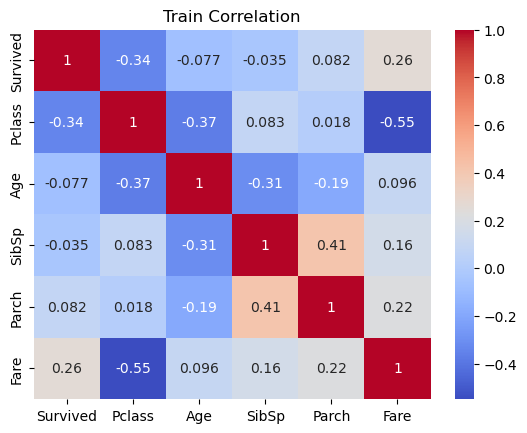

In [56]:
sns.heatmap(train.corr(), annot = True, cmap='coolwarm')
plt.title('Train Correlation')

Text(0.5, 1.0, 'Age vs. Passenger Class')

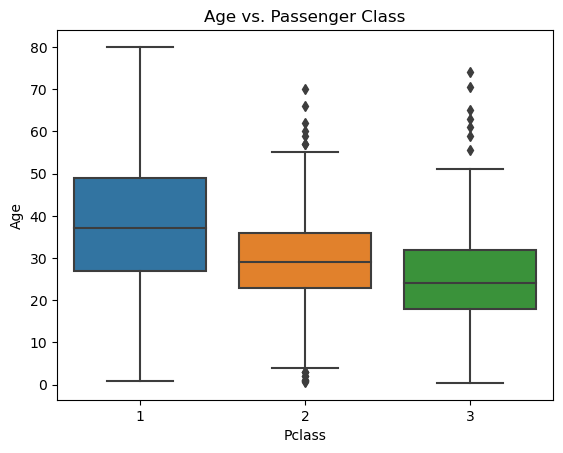

In [57]:
sns.boxplot(data = train, x='Pclass', y='Age')
plt.title('Age vs. Passenger Class')

In [58]:
Pclass_1_median_age = train[train['Pclass'] == 1]['Age'].median()
Pclass_2_median_age = train[train['Pclass'] == 2]['Age'].median()
Pclass_3_median_age = train[train['Pclass'] == 3]['Age'].median()

print('First class median age:', Pclass_1_median_age)
print('Second class median age:', Pclass_2_median_age)
print('Third class median age:', Pclass_3_median_age)

First class median age: 37.0
Second class median age: 29.0
Third class median age: 24.0


In [59]:
def fill_age(df):
    
    if pd.isnull(df['Age']):
        if df['Pclass'] == 1:
            return Pclass_1_median_age
        if df['Pclass'] == 2:
            return Pclass_2_median_age
        else:
            return Pclass_2_median_age
    return df['Age']


In [60]:
#Fill N/A values in age based on the Passenger Class

train['Age'] = train[['Age','Pclass']].apply(fill_age, axis=1)
test['Age'] = test[['Age','Pclass']].apply(fill_age, axis=1)
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S


Text(0.5, 1.0, 'Fare vs. Passenger Class')

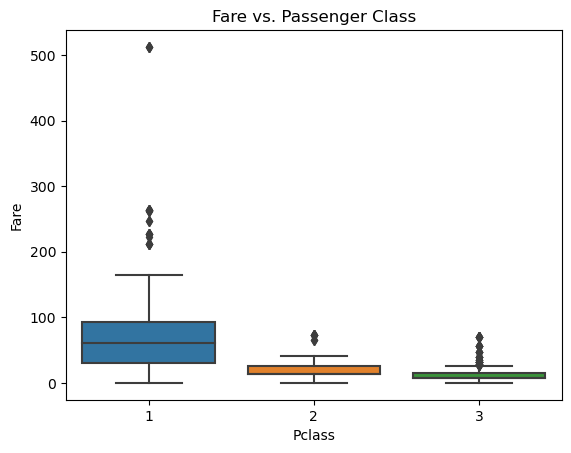

In [61]:
sns.boxplot(data = train, x='Pclass', y='Fare', orient = 'v')
plt.title('Fare vs. Passenger Class')

In [62]:
Pclass_1_median_Fare = train[train['Pclass'] == 1]['Fare'].median()
Pclass_2_median_Fare = train[train['Pclass'] == 2]['Fare'].median()
Pclass_3_median_Fare = train[train['Pclass'] == 3]['Fare'].median()

print('First class median Fare:', Pclass_1_median_Fare)
print('Second class median Fare:', Pclass_2_median_Fare)
print('Third class median Fare:', Pclass_3_median_Fare)

First class median Fare: 60.287499999999994
Second class median Fare: 14.25
Third class median Fare: 8.05


In [63]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data[(data[variable] <= upper) & (data[variable] > lower)]

train = remove_outliers(train, 'Fare', lower = 1, upper=500)

Text(0.5, 1.0, 'Fare vs. Passenger Class')

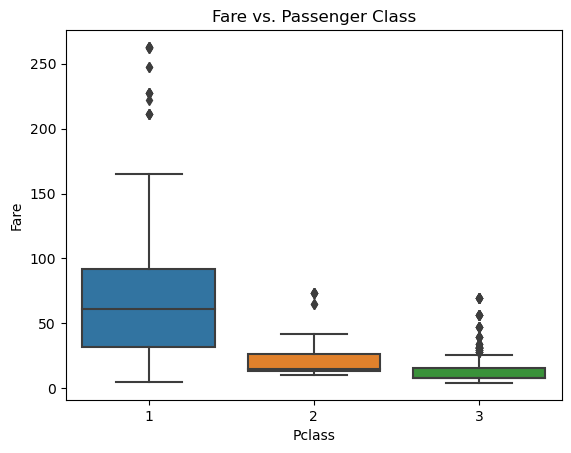

In [64]:
#Update Boxplot

sns.boxplot(data = train, x='Pclass', y='Fare')
plt.title('Fare vs. Passenger Class')

In [65]:
def fill_fare(df):
    
    if pd.isnull(df['Fare']):
        if df['Pclass'] == 1:
            return Pclass_1_median_Fare
        if df['Pclass'] == 2:
            return Pclass_2_median_Fare
        else:
            return Pclass_2_median_Fare
    return df['Fare']


In [66]:
#Fill N/A values in Fare based on the Passenger Class

train['Fare'] = train[['Fare','Pclass']].apply(fill_fare, axis=1)
test['Fare'] = test[['Fare','Pclass']].apply(fill_fare, axis=1)
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S


Text(0.5, 1.0, 'Sex vs. Survival')

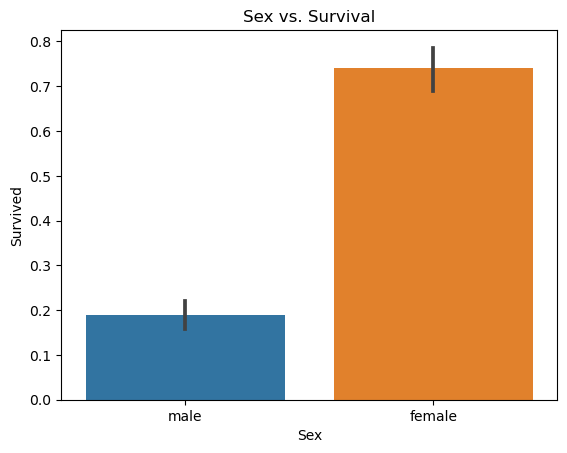

In [67]:
sns.barplot(data = train, x='Sex', y='Survived')
plt.title('Sex vs. Survival')

In [68]:
#One hot encode sex, class and cabin columns

def ohe_sex(data):
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Sex']])
    ohe_data = oh_enc.transform(data[['Sex']]).toarray()
    data_w_ohe = data.join(pd.DataFrame(ohe_data, columns=oh_enc.get_feature_names_out(), index=data.index))

    return data_w_ohe

def ohe_class(data):
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Pclass']])
    ohe_data = oh_enc.transform(data[['Pclass']]).toarray()
    data_w_ohe = data.join(pd.DataFrame(ohe_data, columns=oh_enc.get_feature_names_out(), index=data.index))

    return data_w_ohe

def ohe_cabin(data):
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Cabin']])
    ohe_data = oh_enc.transform(data[['Cabin']]).toarray()
    data_w_ohe = data.join(pd.DataFrame(ohe_data, columns=oh_enc.get_feature_names_out(), index=data.index))

    return data_w_ohe

In [69]:
train = ohe_sex(train)
train = ohe_class(train)
train['Cabin'] = train['Cabin'].str[0]
train = ohe_cabin(train)
y= train['Survived']


test = ohe_sex(test)
test = ohe_class(test)
test['Cabin'] = test['Cabin'].str[0]
test = ohe_cabin(test)

train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
features = ['Fare', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp', 'Parch']

X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [71]:
model = RandomForestClassifier(n_estimators = 7000, min_samples_split = 100, random_state = 1)

model.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


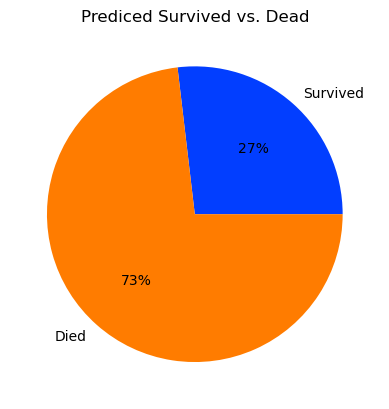

In [72]:
total = len(predictions)
survived = sum(predictions)
survived_total = survived / total
survived_total 

data = [survived_total * 100, 100-survived_total]
labels = ['Survived', 'Died']
  
palette_color = sns.color_palette('bright')
  
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')

plt.title('Prediced Survived vs. Dead')

plt.show()